In [1]:
import json
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
from matplotlib.pyplot import figure

In [19]:
countries = ["Zimbabwe","Zambia","Yemen","Virgin Islands (U.S.)","Virgin Islands","Vietnam","Venezuela","Vanuatu","Uzbekistan","Uruguay","United States","United States Minor Outlying Islands[f]","United Kingdom","Ireland","United Arab Emirates","Ukraine","Uganda","Tuvalu","Turks and Caicos Islands","Turkmenistan","Turkey","Tunisia","Trinidad and Tobago","Tonga","Togo","Timor-Leste","Thailand","Taiwan","Syrian Arab Republic","Switzerland","Sweden","Svalbard","Suriname","Sudan","Sri Lanka","Spain","South Sudan","South Africa","Solomon Islands","Slovenia","Slovakia","Sint Maarten","Singapore","Seychelles","Serbia","Senegal","Saudi Arabia","Sao Tome","San Marino","Samoa","Saint Vincent","Grenadines","Saint Pierre","Saint Martin","Saint Lucia","Saint Kitts and Nevis","Saint Helena","Saint Barthélemy","Rwanda","Russian Federation","Romania","Réunion","Qatar","Puerto Rico","Portugal","Poland","Pitcairn","Philippines","Peru","Paraguay","Papua New Guinea","Panama","Pakistan","Oman","Norway","Northern Mariana Islands","North Macedonia","Norfolk Island","Niue","Nigeria","Niger","Nicaragua","New Zealand","New Caledonia","Netherlands","Nepal","Nauru","Namibia","Myanmar","Mozambique","Morocco","Montenegro","Mongolia","Monaco","Moldova","Micronesia","Mexico","Mayotte","Mauritius","Mauritania","Martinique","Marshall Islands","Malta","Mali","Maldives","Malaysia","Malawi","Madagascar","Macao","Luxembourg","Lithuania","Liechtenstein","Libya","Liberia","Lesotho","Lebanon","Latvia","Kyrgyzstan","Kuwait","Korea","Kiribati","Kenya","Kazakhstan","Jordan","Jersey","Japan","Jamaica","Italy","Israel","Isle of Man","Ireland","Iraq","Iran","Indonesia","India","Iceland","Hungary","Hong Kong","Honduras","Holy See","Heard Island","Haiti","Guyana","Guinea-Bissau","Guinea","Guernsey","Guatemala","Guam","Guadeloupe","Grenada","Greenland","Greece","Gibraltar","Ghana","Germany","Georgia","Gambia","Gabon","French Southern Territories","French Polynesia","French Guiana","France","Finland","Fiji","Faroe Islands","Falkland Islands","Ethiopia","Eswatini","Estonia","Eritrea","Equatorial Guinea","El Salvador","Egypt","Ecuador","Dominican Republic","Dominica","Djibouti","Denmark","Czechia","Cyprus","Curaçao","Cuba","Croatia","Côte d'Ivoire","Costa Rica","Cook Islands","Congo","Comoros","Colombia","China","Chile","Chad","Cayman Islands","Canada","Cameroon","Cambodia","Cabo Verde","Burundi","Burkina Faso","Bulgaria","Brunei Darussalam","Brazil","Bouvet Island","Botswana","Bosnia","Bolivia","Bhutan","Bermuda","Benin","Belize","Belgium","Belarus","Barbados","Bangladesh","Bahrain","Bahamas","Azerbaijan","Austria","Australia","Aruba","Armenia","Argentina","Antigua","Antarctica","Anguilla","Angola","Andorra","American Samoa","Algeria","Albania","Åland Islands","Afghanistan"]

fixed_country = []
song = []
artist_name = []
song_genre = []
lat = []
lon = []

api_lat = ""
url_lat = ""
base_url = ""
api_key = ""
for country in countries:
    try:
        url_lon = url_lat + country + "&limit=" + "1" + "&appid=" + api_lat + "&format=json"
    
        latg = requests.get(url_lon).json()
        lat_hold = latg[0]["lat"]
        lon_hold = latg[0]["lon"]
        
        url = base_url + "&country=" + country + "&api_key=" + api_key + "&format=json"
        fav_song = requests.get(url).json()
        
        song_hold = fav_song['tracks']['track'][0]['name']
        
        hold_name = fav_song['tracks']['track'][0]['artist']['name']
       
        
        print(country)
        
        
        name_base_url = "http://ws.audioscrobbler.com/2.0/?method=artist.gettoptags&"
        name_url = name_base_url + "artist=" + hold_name + "&api_key=" + api_key + "&format=json"
        fave_tag = requests.get(name_url).json()
        tags = fave_tag['toptags']['tag'][0]['name']

        print(tags)
        
        lat.append(lat_hold)
        lon.append(lon_hold)
        fixed_country.append(country)
        song.append(song_hold)
        artist_name.append(hold_name)
        song_genre.append(tags)
    except:
        print("No country found")
        pass
   


Zimbabwe
rock
Zambia
pop
Yemen
soul
No country found
No country found
No country found
Venezuela
alternative
Vanuatu
rock
Uzbekistan
rock
Uruguay
rock
United States
indie
No country found
United Kingdom
indie
Ireland
indie
United Arab Emirates
soul
Ukraine
Grunge
Uganda
soul
No country found
No country found
Turkmenistan
Grunge
Turkey
indie rock
Tunisia
indie rock
No country found
Tonga
alternative
Togo
Hip-Hop
No country found
Thailand
rock
Taiwan
soul
No country found
Switzerland
soul
Sweden
rock
No country found
Suriname
acoustic
Sudan
soul
Sri Lanka
acoustic
Spain
alternative
No country found
South Africa
Grunge
Solomon Islands
pop
No country found
No country found
No country found
Singapore
soul
Seychelles
rock
Serbia
indie rock
Senegal
soul
Saudi Arabia
soul
No country found
San Marino
indie
Samoa
pop
No country found
No country found
No country found
No country found
Saint Lucia
Hip-Hop
No country found
Saint Helena
alternative
No country found
Rwanda
indie
No country found
Roma

In [3]:
data_df = pd.DataFrame({'countries': fixed_country, 'songs': song, 'Artist Name': artist_name, 'Song Genre': song_genre, 'latitude': lat, 'longitude': lon})

data_df

NameError: name 'song' is not defined

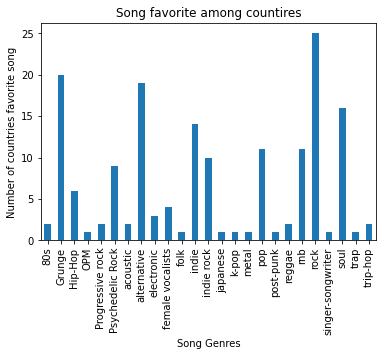

In [21]:
# Split up our data into groups based upon 'Patron Type Definition'
patron_groups = data_df.groupby('Song Genre')

# Find out how many of each patron type borrowed library items
patron_borrows = patron_groups['Song Genre'].count()

# Chart our data, give it a title, and label the axes
patron_chart = patron_borrows.plot(kind="bar", title="Song favorite among countires", )
patron_chart.set_xlabel("Song Genres")
patron_chart.set_ylabel("Number of countries favorite song")

plt.savefig("Bar_chart.png")

plt.show()


In [22]:
gyms = data_df['Song Genre'].value_counts()
gyms

rock                 25
Grunge               20
alternative          19
soul                 16
indie                14
pop                  11
rnb                  11
indie rock           10
Psychedelic Rock      9
Hip-Hop               6
female vocalists      4
electronic            3
reggae                2
80s                   2
Progressive rock      2
acoustic              2
trip-hop              2
OPM                   1
folk                  1
japanese              1
post-punk             1
singer-songwriter     1
k-pop                 1
trap                  1
metal                 1
Name: Song Genre, dtype: int64

In [23]:
s = pd.Series([1,2,3,4], index=['a', 'b', 'c', 'd'])
gerne = []
gerne_val = []


for rownum,(indx,val) in enumerate(gyms.iteritems()):
    gerne.append(indx)
    gerne_val.append(val)

plot_df = pd.DataFrame({'Genre': gerne, 'Value': gerne_val})
plot_df

,Genre,Value
0,rock,25
1,Grunge,20
2,alternative,19
3,soul,16
4,indie,14
5,pop,11
6,rnb,11
7,indie rock,10
8,Psychedelic Rock,9
9,Hip-Hop,6


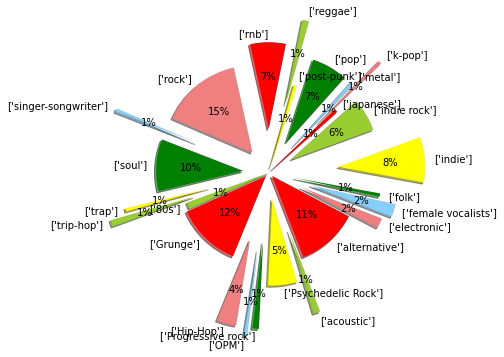

In [24]:
gyms = patron_groups['Song Genre'].unique()
members = patron_groups['Song Genre'].count()
colors = ["yellowgreen", "red", "lightcoral", "lightskyblue","green","yellow"]
explode = (0, 0.05, 0.8, 0.9,0.8, 0.3, .7, .05,0.4, 0.5, 0.3, 0.8,0.3, 0.05, 0.8, 0.4,0.4, 0.05, 0.8, 0.5,0.3, 0.9, 0.3, 0.7,0.9)
plt.pie(members, explode=explode, labels=gyms, colors=colors,
        autopct="%1.0f%%", shadow=True, startangle=200)
#plt.axis("equal")

plt.savefig("Pie_chart.png")

plt.show()

In [25]:
temperatures = patron_groups['Song Genre'].count()

mean_numpy = np.mean(temperatures)
print(f"The mean of all the summed genre favorites is {mean_numpy}")

median_numpy = np.median(temperatures)
print(f"The median of all the summed genre favorites is {median_numpy}")

max_scipy = np.max(temperatures)
print(f"The maximum of all the summed genre favorites is {max_scipy}")

min_scipy = np.min(temperatures)
print(f"The minimum of all the summed genre favorites is {min_scipy}")



The mean of all the summed genre favorites is 6.64
The median of all the summed genre favorites is 2.0
The maximum of all the summed genre favorites is 25
The minimum of all the summed genre favorites is 1


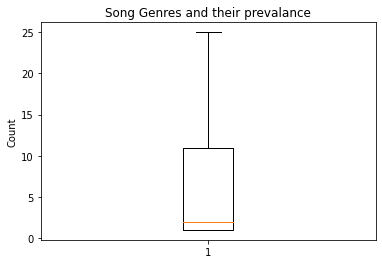

In [26]:
times = patron_groups['Song Genre'].count()
fig1, ax1 = plt.subplots()
ax1.set_title('Song Genres and their prevalance')
ax1.set_ylabel('Count')
ax1.boxplot(times)

plt.savefig("..//Analysis Photos//Analysis #2//Box_whisker.png")

plt.show()

In [27]:
n_lat = data_df.loc[data_df["latitude"] >= 0]
s_lat = data_df.loc[data_df["latitude"] < 0]

In [28]:
n_lat

,countries,songs,Artist Name,Song Genre,latitude,longitude
0,Zimbabwe,The Scientist,Coldplay,rock,4.760989,-6.666080
2,Yemen,Hello,Adele,soul,15.268007,42.583216
3,Venezuela,Creep,Radiohead,alternative,21.739424,-78.795560
5,Uzbekistan,Numb,Linkin Park,rock,41.312336,69.278708
7,United States,Mr. Brightside,The Killers,indie,16.732501,-169.528254
...,...,...,...,...,...,...
161,Angola,Can't Feel My Face,The Weeknd,rnb,41.634874,-84.999280
162,Andorra,Creep,Radiohead,alternative,42.506939,1.521247
163,Algeria,Creep,Radiohead,alternative,36.775361,3.060188
164,Albania,The Less I Know the Better,Tame Impala,Psychedelic Rock,5.758765,-73.915162


In [29]:
s_lat

,countries,songs,Artist Name,Song Genre,latitude,longitude
1,Zambia,Liability,Lorde,pop,-10.943272,14.144345
4,Vanuatu,Under the Bridge,Red Hot Chili Peppers,rock,-17.687331,168.304937
6,Uruguay,Losing My Religion,R.E.M.,rock,-32.504939,-53.504112
26,South Africa,Smells Like Teen Spirit,Nirvana,Grunge,-23.037948,30.649379
27,Solomon Islands,As It Was,Harry Styles,pop,-8.000000,159.000000
36,Saint Helena,Creep,Radiohead,alternative,-15.969457,-5.712944
41,Portugal,The Less I Know the Better,Tame Impala,Psychedelic Rock,-1.629263,-45.236815
45,Paraguay,Do I Wanna Know?,Arctic Monkeys,indie rock,-25.280046,-57.634381
46,Papua New Guinea,Close to You,Maxi Priest,reggae,-5.522593,142.087091
51,Norfolk Island,Smells Like Teen Spirit,Nirvana,Grunge,-29.028958,167.958729


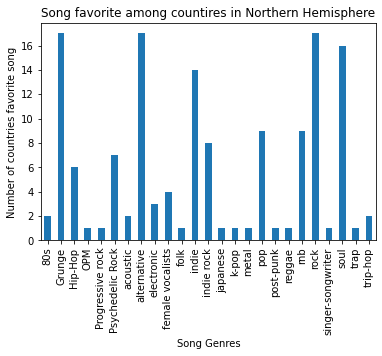

In [30]:
# Split up our data into groups based upon 'Patron Type Definition'
patron_groups_north = n_lat.groupby('Song Genre')

# Find out how many of each patron type borrowed library items
patron_borrows_north = patron_groups_north['Song Genre'].count()

# Chart our data, give it a title, and label the axes
patron_chart_north = patron_borrows_north.plot(kind="bar", title="Song favorite among countires in Northern Hemisphere")
patron_chart_north.set_xlabel("Song Genres")
patron_chart_north.set_ylabel("Number of countries favorite song")

plt.savefig("Bar_chart_north.png")

plt.show()


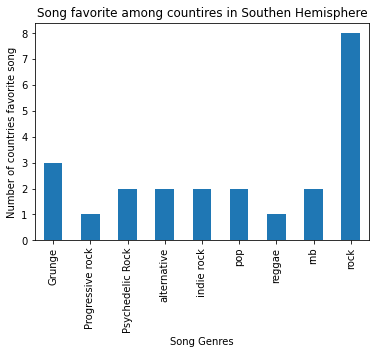

In [31]:
# Split up our data into groups based upon 'Patron Type Definition'
patron_groups_south = s_lat.groupby('Song Genre')

# Find out how many of each patron type borrowed library items
patron_borrows_south = patron_groups_south['Song Genre'].count()

# Chart our data, give it a title, and label the axes
patron_chart_south = patron_borrows_south.plot(kind="bar", title="Song favorite among countires in Southen Hemisphere")
patron_chart_south.set_xlabel("Song Genres")
patron_chart_south.set_ylabel("Number of countries favorite song")

plt.savefig("Bar_chart_south.png")

plt.show()

In [32]:
quartiles = times.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 1.0
The upper quartile of temperatures is: 11.0
The interquartile range of temperatures is: 10.0
The the median of temperatures is: 2.0 
Values below -14.0 could be outliers.
Values above 26.0 could be outliers.


In [33]:
patron_groups_n = n_lat.groupby('Song Genre')

temperatures_n = patron_groups_n['Song Genre'].count()

mean_numpy = np.mean(temperatures_n)
print(f"The mean of all the summed genre favorites is {mean_numpy}")

median_numpy = np.median(temperatures_n)
print(f"The median of all the summed genre favorites is {median_numpy}")

mode_scipy = np.max(temperatures_n)
print(f"The most of all the summed genre favorites is {mode_scipy}")

min_scipy = np.min(temperatures_n)
print(f"The minimum of all the summed genre favorites is {min_scipy}")


The mean of all the summed genre favorites is 5.72
The median of all the summed genre favorites is 2.0
The most of all the summed genre favorites is 17
The minimum of all the summed genre favorites is 1


In [34]:
patron_groups_n = s_lat.groupby('Song Genre')

temperatures_n = patron_groups_n['Song Genre'].count()

mean_numpy = np.mean(temperatures_n)
print(f"The mean of all the summed genre favorites is {mean_numpy}")

median_numpy = np.median(temperatures_n)
print(f"The median of all the summed genre favorites is {median_numpy}")

mode_scipy = np.max(temperatures_n)
print(f"The most of all the summed genre favorites is {mode_scipy}")

min_scipy = np.min(temperatures_n)
print(f"The minimum of all the summed genre favorites is {min_scipy}")


The mean of all the summed genre favorites is 2.5555555555555554
The median of all the summed genre favorites is 2.0
The most of all the summed genre favorites is 8
The minimum of all the summed genre favorites is 1
